# **Alunos**
*   Beatriz Vilarim
*   João ricardo Leitão Barros
*   João Victor Almeida

In [630]:
# @title O XGBoost não está instalado por default no Google Colab. Nesse caso, precisamos instalar via pip.
!pip install scikit-learn xgboost

In [631]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [632]:
def calculate_mape(y_true, y_pred):
    # Evitar divisão por zero
    y_true = np.where(y_true == 0, 1e-10, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [633]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [634]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/cogenital_sy.csv")

In [635]:
df

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41757,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,...,1.0,3.0,1.0,4.0,0.0,1.0,3.0,0.0,3.0,25.0
41758,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,15.0
41759,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,23.0
41760,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,3.0,2.0,2.0,25.0


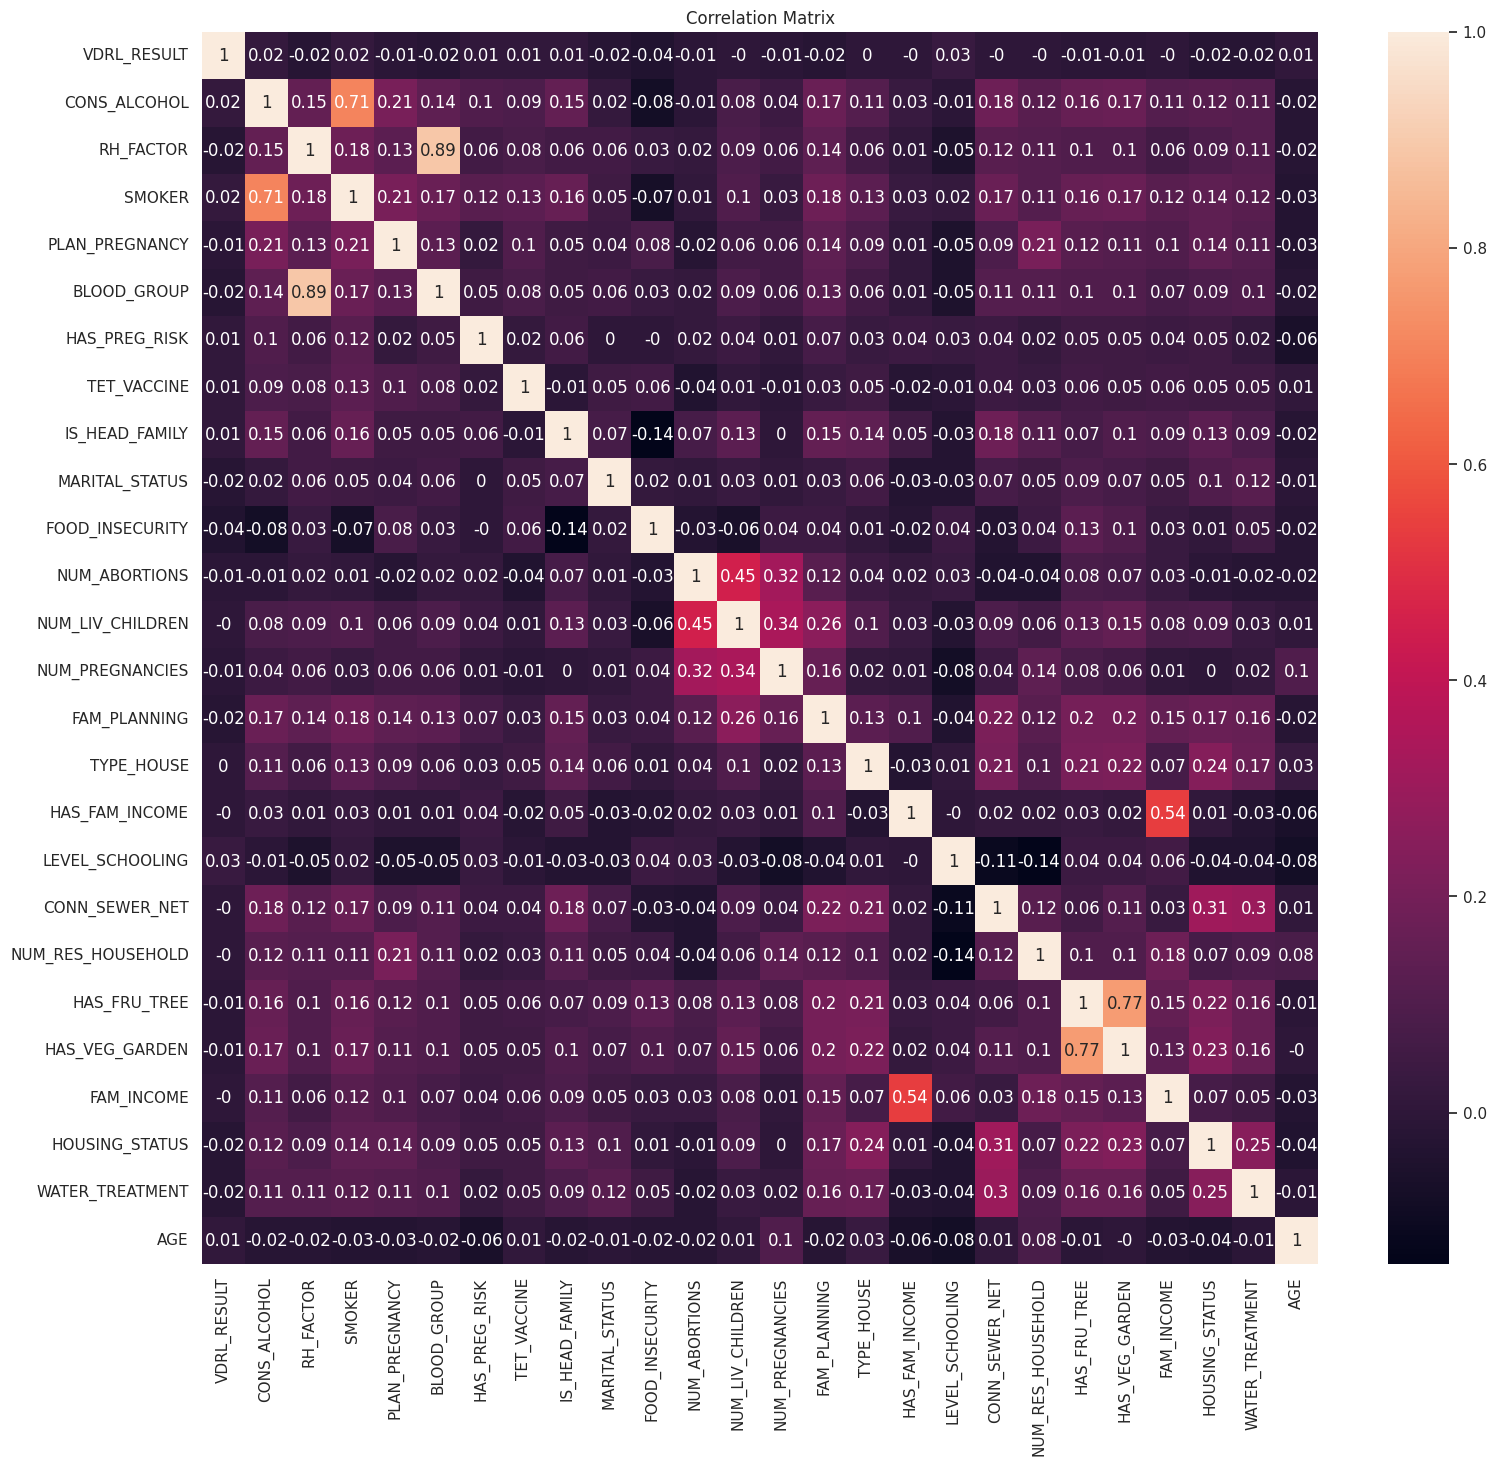

In [636]:
# @title Analise do Dataset

correlation_matrix = df.corr().round(2)
plt.figure(figsize=(18, 16))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-637-a4bec63e4384>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VDRL_RESULT'], bins=30)


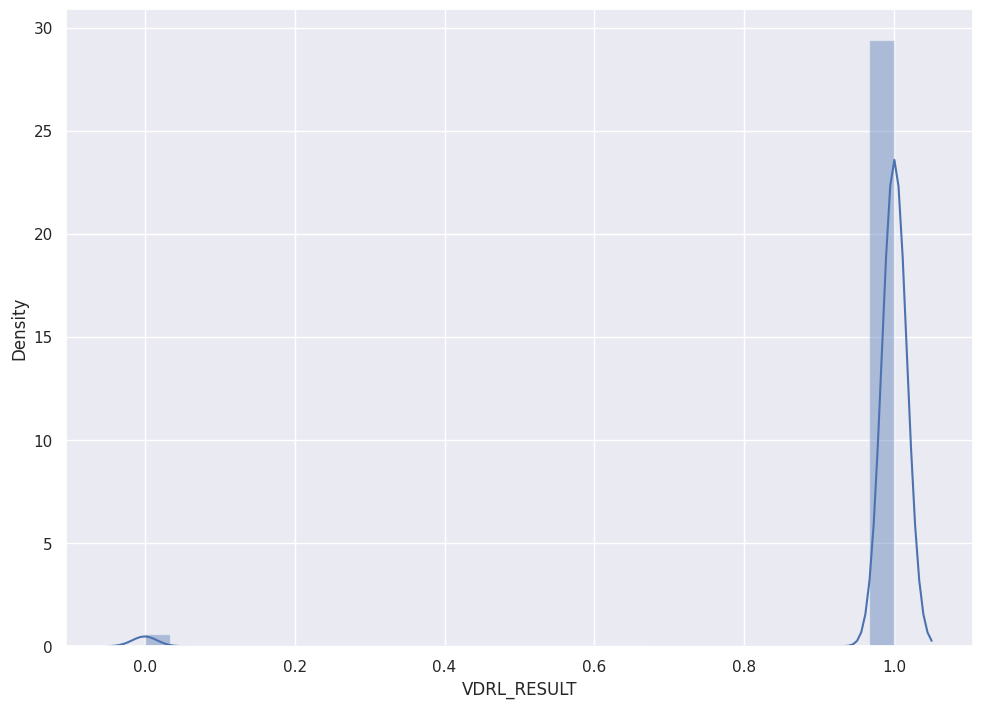

In [637]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['VDRL_RESULT'], bins=30)
plt.show()

<ipython-input-638-e439defdf0ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], bins=30)


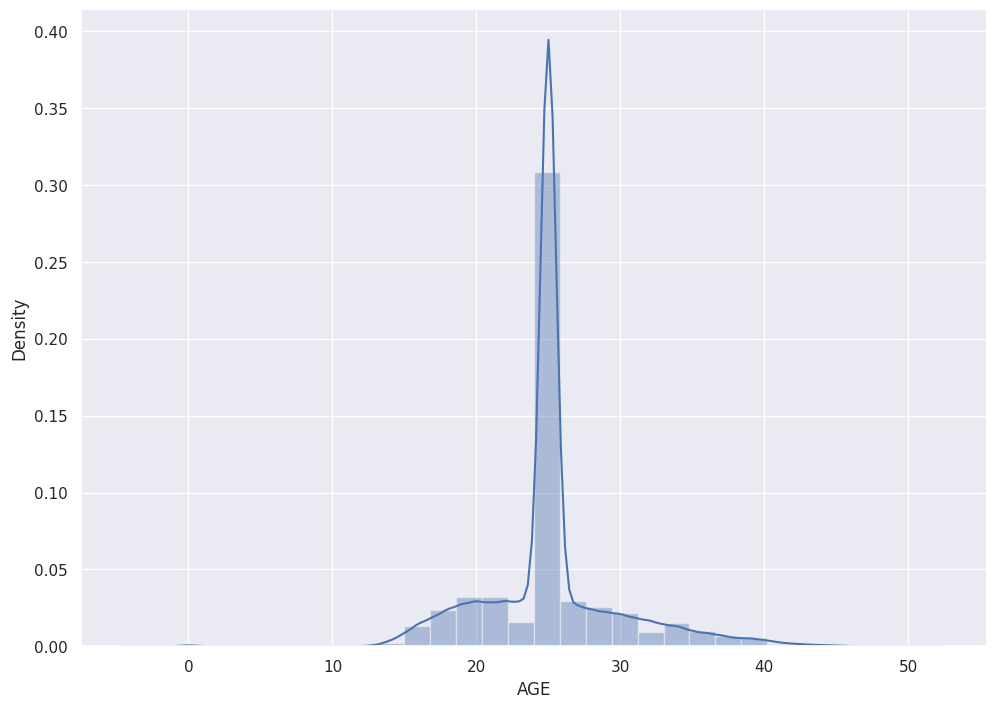

In [638]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['AGE'], bins=30)
plt.show()

A matrix de correlação e os dois plotes do gráfico, mostram uma pouca correlação e dependência entre as colunas. Isso porvávelmente se deve ao pouco balanciamento do próprio dataset e mencionado no artigo. Será aplicado BODS para consertar este problema.

**Pre-Processamento**

In [639]:
target_classification = 'VDRL_RESULT'
target_regression = 'AGE'
features = [col for col in df.columns if col not in [target_classification, target_regression]]

#Dividindo o dataset em dois para poder aplicar um BODS apenas na parte de classificação onde esta deficiente
data_classification = df[features + [target_classification]].dropna()
data_regression = df[features + [target_regression]].dropna()

**Classificação**


In [640]:
positiveCases = data_classification[data_classification['VDRL_RESULT'] == 0]
positiveCases

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
55,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,...,0.0,4.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0
116,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,4.0,1.0,1.0,2.0,1.0,2.0,0.0
125,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,0.0,5.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0
149,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,0.0,...,1.0,4.0,1.0,4.0,1.0,1.0,3.0,2.0,2.0,0.0
240,1.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,...,0.0,4.0,0.0,4.0,1.0,1.0,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41535,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,...,0.0,6.0,0.0,4.0,2.0,2.0,3.0,0.0,2.0,0.0
41604,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0
41690,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,0.0
41696,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,...,0.0,4.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0


In [641]:
negativeCases = data_classification[data_classification['VDRL_RESULT'] == 1]
negativeCases

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0
2,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,1.0
3,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,2.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41757,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,...,1.0,3.0,1.0,4.0,0.0,1.0,3.0,0.0,3.0,1.0
41758,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0
41759,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,5.0,2.0,...,1.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0
41760,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,...,1.0,2.0,0.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0


In [642]:
negativeCases_redux = negativeCases.sample(n = 826)
negativeCases_redux

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
12083,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0
37168,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,0.0,6.0,0.0,4.0,2.0,2.0,0.0,1.0,0.0,1.0
36584,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0
37742,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
1587,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,3.0,1.0,1.0,2.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30836,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0
20755,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,...,0.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
5687,1.0,2.0,1.0,0.0,4.0,1.0,1.0,1.0,5.0,0.0,...,0.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
39704,1.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,1.0,...,1.0,4.0,0.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0


In [643]:
data_classificationRedux = pd.concat([negativeCases_redux, positiveCases], ignore_index=True)
data_classificationRedux

,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,VDRL_RESULT
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,0.0,6.0,0.0,4.0,2.0,2.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,2.0,...,0.0,5.0,0.0,3.0,1.0,1.0,2.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,...,0.0,6.0,0.0,4.0,2.0,2.0,3.0,0.0,2.0,0.0
1648,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0
1649,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,2.0,...,0.0,2.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,0.0
1650,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,...,0.0,4.0,1.0,3.0,1.0,1.0,2.0,0.0,2.0,0.0


In [644]:
#SMOTEENN na parte que será usada para classficação
X_class = data_classificationRedux[features]
y_class = data_classificationRedux[target_classification]
X_trainClass, X_testClass, y_trainClass, y_testClass = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

X_class_balanced, y_class_balanced = SMOTEENN().fit_resample(X_trainClass, y_trainClass)
print("Amostras após SMOTEENN:", len(X_class_balanced))

selector_class = SelectKBest(f_classif, k=24)
selector_class.fit(X_class_balanced, y_class_balanced)
print("Scores de SelectKBest (Classificação):", selector_class.scores_)

X_class_selected = selector_class.transform(X_class_balanced)

Amostras após SMOTEENN: 198
Scores de SelectKBest (Classificação): [1.97392110e+00 2.68428018e+01 5.28213149e+00 1.73860895e+01
 1.77374982e+01 1.02264190e-01 2.48629240e+00 5.36156247e+00
 1.96479380e+01 5.96338605e+01 3.54718952e+00 5.88675569e+00
 6.73896449e-01 1.72265263e+00 8.53638799e-03 8.18266656e-01
 4.97116311e+00 1.03012349e-01 1.04433088e+01 1.42005111e+00
 7.50843330e-01 4.64069344e+00 2.45404206e+00 3.96552986e+00]


**Comparação de modelos de classificação**

In [645]:
# @title Fazendo previsões com o Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_class_balanced, y_class_balanced)

RandomForestClassifier(random_state=42)

In [646]:
y_pred_rf = model_rf.predict(X_testClass)

In [647]:
k = 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model_rf, X_testClass, y_testClass, cv=kf, scoring='accuracy')

In [648]:
average_accuracy = np.mean(scores)
print(f"Accuracy score for each fold (Random Forest): {[round(score, 4) for score in scores]}")
print(f"Average accuracy across {k} folds: {average_accuracy:.2f}")

Accuracy score for each fold (Random Forest): [0.72, 0.68, 0.44, 0.56, 0.76, 0.56, 0.52, 0.6, 0.56, 0.76, 0.64, 0.32, 0.56, 0.44, 0.52, 0.56, 0.5, 0.5417, 0.7083, 0.4583]
Average accuracy across 20 folds: 0.57


In [649]:
# @title Avaliando o desempenho do Random Forest
accuracy = metrics.accuracy_score(y_testClass, y_pred_rf)
recall = metrics.recall_score(y_testClass, y_pred_rf)
precision = metrics.precision_score(y_testClass, y_pred_rf)
f1 = metrics.f1_score(y_testClass, y_pred_rf)

print(f"Acurácia do modelo: {accuracy:.2f}")
print(f"Recall do modelo: {recall:.2f}")
print(f"Precisão do modelo: {precision:.2f}")
print(f"F1-score do modelo: {f1:.2f}")

Acurácia do modelo: 0.62
Recall do modelo: 0.69
Precisão do modelo: 0.60
F1-score do modelo: 0.64


In [650]:
# @title Fazendo previsões com o XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_class_balanced, y_class_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [651]:
y_pred_xgb = model_xgb.predict(X_testClass)

In [652]:
k = 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(model_xgb, X_testClass, y_testClass, cv=kf, scoring='accuracy')

In [653]:
average_accuracy = np.mean(scores)
print(f"Accuracy score for each fold (XGB): {[round(score, 4) for score in scores]}")
print(f"Average accuracy across {k} folds: {average_accuracy:.2f}")

Accuracy score for each fold (XGB): [0.64, 0.56, 0.6, 0.56, 0.72, 0.56, 0.56, 0.6, 0.56, 0.52, 0.64, 0.4, 0.52, 0.6, 0.52, 0.6, 0.4583, 0.5833, 0.5833, 0.5833]
Average accuracy across 20 folds: 0.57


In [654]:
# @title Avaliando o desempenho do XGB
accuracy = metrics.accuracy_score(y_testClass, y_pred_xgb)
recall = metrics.recall_score(y_testClass, y_pred_xgb)
precision = metrics.precision_score(y_testClass, y_pred_xgb)
f1 = metrics.f1_score(y_testClass, y_pred_xgb)

print(f"Acurácia do modelo: {accuracy:.2f}")
print(f"Recall do modelo: {recall:.2f}")
print(f"Precisão do modelo: {precision:.2f}")
print(f"F1-score do modelo: {f1:.2f}")

Acurácia do modelo: 0.62
Recall do modelo: 0.70
Precisão do modelo: 0.60
F1-score do modelo: 0.65


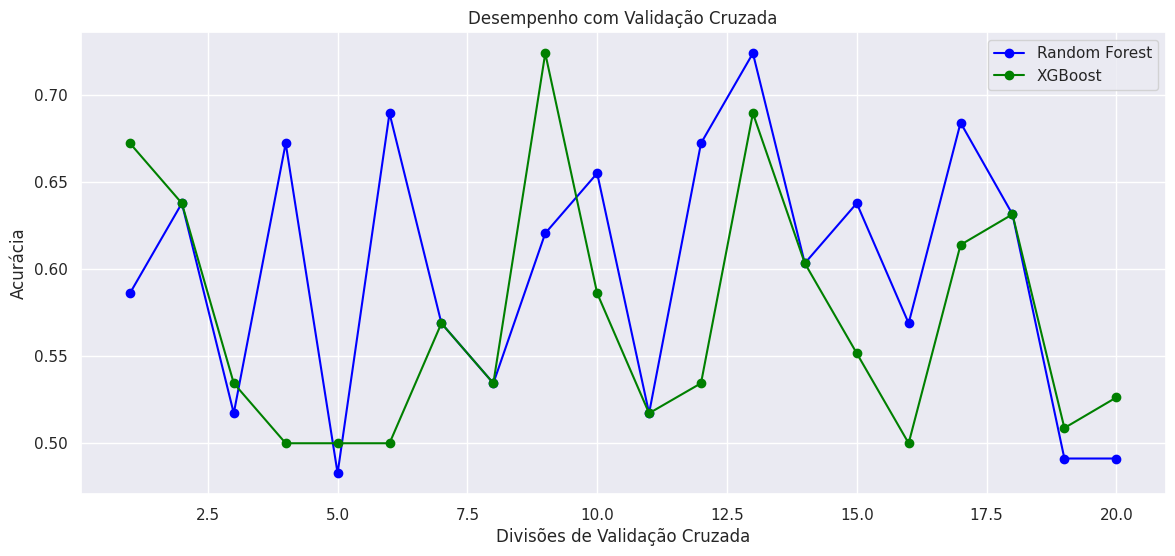

In [655]:
scores_rf = cross_val_score(model_rf, X_trainClass, y_trainClass, cv=20, scoring='accuracy')
scores_xgb = cross_val_score(model_xgb, X_trainClass, y_trainClass, cv=20, scoring='accuracy')

# Plotando o desempenho dos dois modelos
plt.figure(figsize=(14, 6))

# Acurácia do Random Forest
plt.plot(range(1, 21), scores_rf, marker='o', color='blue', label='Random Forest')

# Acurácia do XGBoost
plt.plot(range(1, 21), scores_xgb, marker='o', color='green', label='XGBoost')

plt.title('Desempenho com Validação Cruzada')
plt.xlabel('Divisões de Validação Cruzada')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

**Regressão**

In [656]:
# Função para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [657]:
data_regression = data_regression.drop(columns = ['CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'BLOOD_GROUP', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'TYPE_HOUSE', 'HAS_FAM_INCOME',
                                                         'CONN_SEWER_NET', 'NUM_RES_HOUSEHOLD', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'HOUSING_STATUS', 'WATER_TREATMENT'])
features_reg = [col for col in data_regression.columns if col not in [target_classification, target_regression]]

In [658]:
data_regression

,PLAN_PREGNANCY,HAS_PREG_RISK,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,LEVEL_SCHOOLING,FAM_INCOME,AGE
0,1.0,1.0,0.0,0.0,3.0,4.0,4.0,0.0,5.0,0.0,25.0
1,1.0,1.0,5.0,0.0,3.0,4.0,1.0,1.0,5.0,2.0,25.0
2,1.0,1.0,5.0,2.0,0.0,0.0,1.0,0.0,6.0,3.0,24.0
3,0.0,0.0,5.0,2.0,3.0,2.0,3.0,0.0,2.0,0.0,28.0
4,1.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,4.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
41757,0.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,25.0
41758,1.0,1.0,5.0,2.0,3.0,4.0,4.0,1.0,4.0,0.0,15.0
41759,0.0,1.0,5.0,2.0,3.0,4.0,4.0,1.0,4.0,0.0,23.0
41760,1.0,1.0,0.0,0.0,3.0,4.0,1.0,1.0,2.0,3.0,25.0


In [659]:
print("Valores mínimos na variável 'AGE':", data_regression['AGE'].min())

Valores mínimos na variável 'AGE': -3.0


In [660]:
data_regression_modified = data_regression.copy()  # Criando uma cópia do dataset original

# Incrementar todos os valores, exceto os da coluna 'AGE'
for column in data_regression_modified.columns:
    if column != 'AGE':
        data_regression_modified[column] = data_regression_modified[column] + 1

# Dropar linhas onde a coluna 'AGE' é menor ou igual a 0
data_regression_modified = data_regression_modified[data_regression_modified['AGE'] > 0]

In [661]:
data_regression_modified

,PLAN_PREGNANCY,HAS_PREG_RISK,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,LEVEL_SCHOOLING,FAM_INCOME,AGE
0,2.0,2.0,1.0,1.0,4.0,5.0,5.0,1.0,6.0,1.0,25.0
1,2.0,2.0,6.0,1.0,4.0,5.0,2.0,2.0,6.0,3.0,25.0
2,2.0,2.0,6.0,3.0,1.0,1.0,2.0,1.0,7.0,4.0,24.0
3,1.0,1.0,6.0,3.0,4.0,3.0,4.0,1.0,3.0,1.0,28.0
4,2.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,5.0,1.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
41757,1.0,2.0,1.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,25.0
41758,2.0,2.0,6.0,3.0,4.0,5.0,5.0,2.0,5.0,1.0,15.0
41759,1.0,2.0,6.0,3.0,4.0,5.0,5.0,2.0,5.0,1.0,23.0
41760,2.0,2.0,1.0,1.0,4.0,5.0,2.0,2.0,3.0,4.0,25.0


In [662]:
print("Valores mínimos na variável 'AGE':", data_regression_modified['AGE'].min())

Valores mínimos na variável 'AGE': 1.0


In [663]:
#Apenas aplicando o Select por falta de necessidade
X_reg = data_regression_modified[features_reg]
y_reg = data_regression_modified[target_regression]
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_trainReg_scaled = scaler.fit_transform(X_trainReg)
X_testReg_scaled = scaler.transform(X_testReg)

In [664]:
X_trainReg_scaled

array([[ 2.35628291, -2.21935356,  1.14903293, ..., -0.94140931,
        -0.838024  , -0.99733244],
       [-1.12487125, -2.21935356, -0.60358578, ..., -0.94140931,
        -1.41361993, -0.99733244],
       [ 0.61570583,  0.19533419, -1.04174045, ...,  1.52901312,
        -0.26242808,  1.45570395],
       ...,
       [-1.12487125,  0.19533419,  1.14903293, ..., -0.94140931,
        -0.26242808,  1.45570395],
       [-1.12487125,  0.19533419, -0.60358578, ...,  0.29380191,
         0.31316785,  0.63802516],
       [ 0.61570583,  0.19533419, -1.04174045, ...,  0.29380191,
        -1.98921586, -0.99733244]])

In [665]:
X_testReg_scaled

array([[-1.12487125,  0.19533419,  1.14903293, ...,  0.29380191,
        -0.838024  , -0.17965364],
       [-1.12487125,  0.19533419, -0.60358578, ..., -0.94140931,
         0.31316785, -0.99733244],
       [ 0.61570583,  0.19533419, -1.04174045, ...,  1.52901312,
         0.31316785,  1.45570395],
       ...,
       [ 0.61570583,  0.19533419,  1.14903293, ..., -0.94140931,
        -0.26242808,  0.63802516],
       [-1.12487125,  0.19533419,  1.14903293, ..., -0.94140931,
        -0.838024  , -0.99733244],
       [ 0.61570583,  0.19533419, -1.04174045, ..., -0.94140931,
         0.31316785, -0.99733244]])

In [666]:
y_trainReg

,AGE
13372,18.0
36953,40.0
23030,18.0
33327,25.0
39106,27.0
...,...
6269,25.0
11288,36.0
38188,16.0
860,25.0


In [667]:
y_testReg

,AGE
23666,25.0
24398,31.0
4776,25.0
36212,25.0
16738,21.0
...,...
38083,25.0
36475,25.0
26596,25.0
10816,25.0


In [668]:
# @title Fazendo previsões com o Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_trainReg_scaled, y_trainReg)

RandomForestRegressor(random_state=42)

In [669]:
y_pred_rf = rf_reg.predict(X_testReg_scaled)

In [670]:
# @title Avaliando o desempenho do Random Forest
mae_rf = mean_absolute_error(y_testReg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_testReg, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_testReg, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf}%")

Mean Absolute Error (MAE): 3.1529792480918597
Root Mean Squared Error (RMSE): 4.45585592146909
Mean Absolute Percentage Error (MAPE): 13.361448510514293%


In [671]:
# @title Fazendo previsões com o Random Forest Regressor
XGB_reg = XGBRegressor(n_estimators=100, random_state=42)
XGB_reg.fit(X_trainReg_scaled, y_trainReg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [672]:
y_pred_xgb = XGB_reg.predict(X_testReg_scaled)

In [673]:
# @title Avaliando o desempenho do XGBoost
mae_xgb = mean_absolute_error(y_testReg, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_testReg, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_testReg, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb}%")

Mean Absolute Error (MAE): 2.9841463911103903
Root Mean Squared Error (RMSE): 4.222471977152366
Mean Absolute Percentage Error (MAPE): 12.716920200977544%


In [674]:
# Calcular métricas
metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [mae_rf, mae_xgb],
    'RMSE': [rmse_rf, rmse_xgb],
    'MAPE': [mape_rf, mape_xgb]
}

In [675]:
metrics_df = pd.DataFrame(metrics)

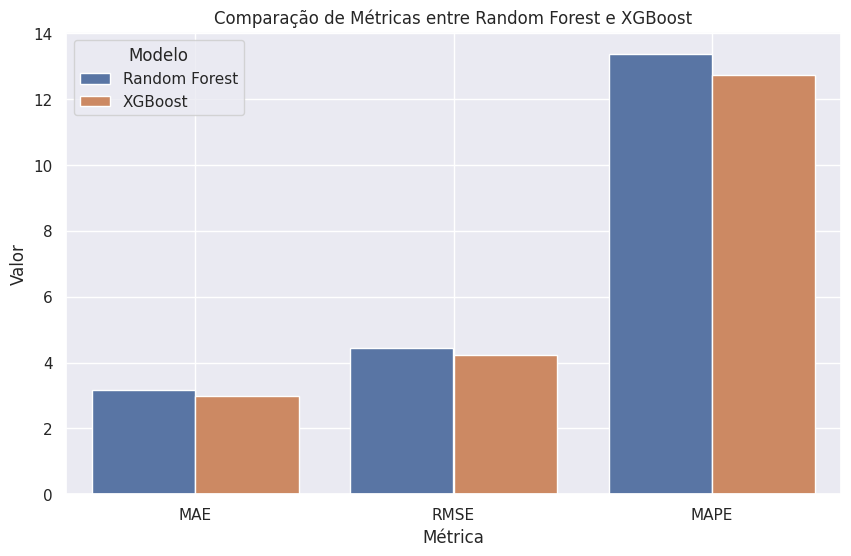

In [676]:
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['MAE', 'RMSE', 'MAPE'], var_name='Metric', value_name='Value')
sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model')
plt.title('Comparação de Métricas entre Random Forest e XGBoost')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Modelo')
plt.grid(True)
plt.show()

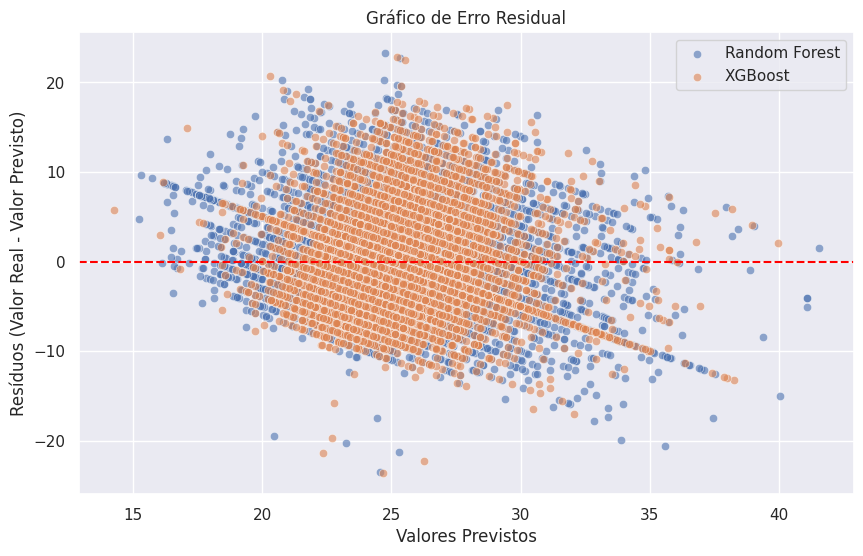

In [677]:
plt.figure(figsize=(10, 6))

# Resíduos para Random Forest
rf_residuals = y_testReg - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=rf_residuals, label='Random Forest', alpha=0.6)

# Resíduos para XGBoost
xgb_residuals = y_testReg - y_pred_xgb
sns.scatterplot(x=y_pred_xgb, y=xgb_residuals, label='XGBoost', alpha=0.6)

plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Erro Residual')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos (Valor Real - Valor Previsto)')
plt.legend()
plt.grid(True)
plt.show()

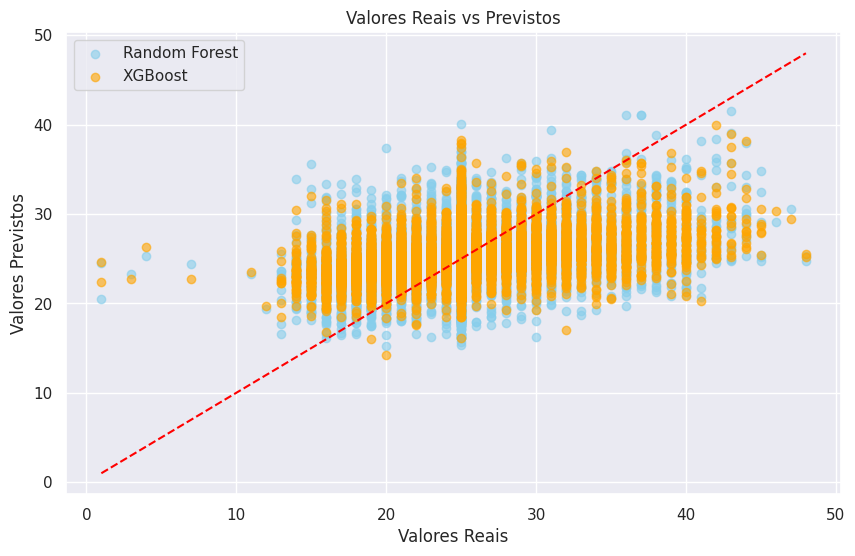

In [678]:
plt.figure(figsize=(10, 6))

# Valores previstos vs reais para Random Forest
plt.scatter(y_testReg, y_pred_rf, label='Random Forest', alpha=0.6, color='skyblue')

# Valores previstos vs reais para XGBoost
plt.scatter(y_testReg, y_pred_xgb, label='XGBoost', alpha=0.6, color='orange')

plt.plot([y_testReg.min(), y_testReg.max()], [y_testReg.min(), y_testReg.max()], color='red', linestyle='--')
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.grid(True)
plt.show()